# Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. 
Its behavior is easiest to visualize by looking at a two-dimensional dataset. 

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

Consider the following 200 points:

In [1]:
import numpy as np
from sklearn import datasets

import pandas as pd
import numpy as np


from sklearn.decomposition import PCA
from sklearn import datasets
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from erudition.learning.helpers.plots.plotly_render import render, scatter, render_with_shape


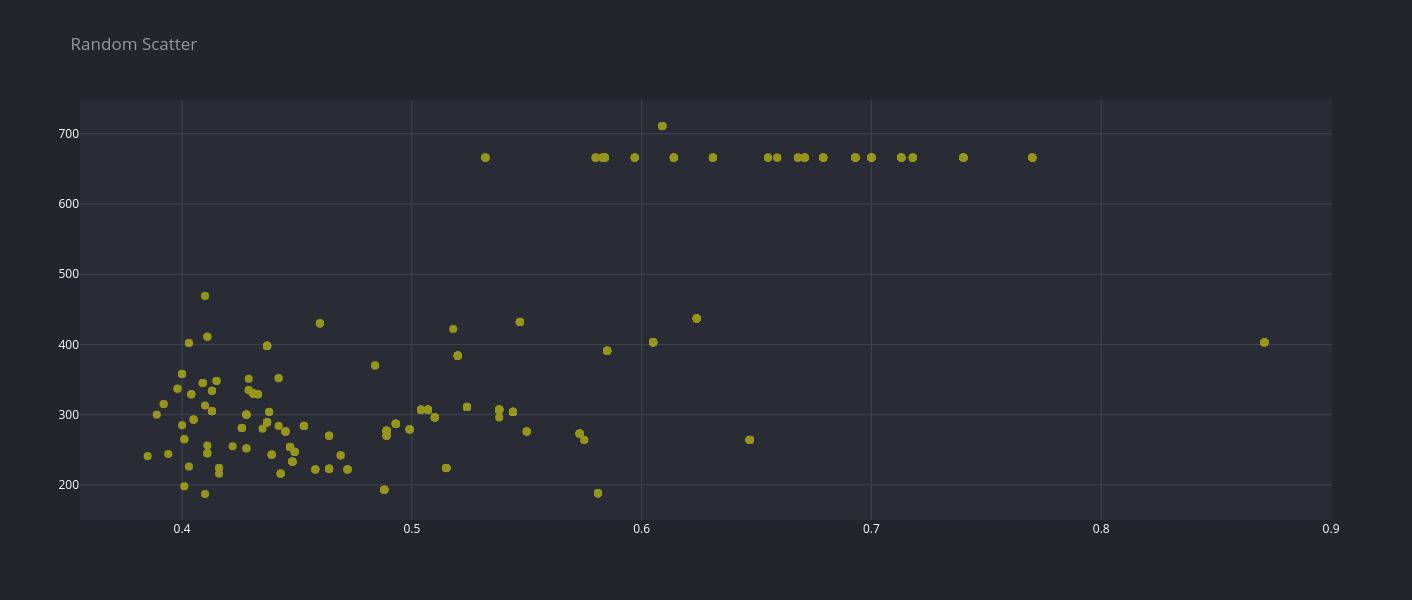

In [54]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 2000)).T

X = datasets.load_boston().data

Z = X[:,[4,9]]

s=scatter(Z[:, 0], Z[:, 1], '', mode='markers', size=8, color='yellow')
fig=go.Figure(data=s)

render(fig, 'Random Scatter', width=600, height=600)


Now, instead of trying to predict the values of y from x we want the unsupervised learning problem attempt to learn about the relationship between the x and y values.
In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. 
Using Scikit-Learn's PCA estimator, we can compute this as follows: